# STAT 201 Project

## Group 11
Ray Tao    
Florence Wang    
Lesley Mai   
Harsha Chhetri

<hr style="opacity: 0.3" />

# Compare the delay rate of two popular airlines in the United States

## Introduction

### Basic Information

As the demand of fast speed travel, taking plane becomes one of the most popular choice during the past several decades. At the same time, flight delay is most depressing but also sometimes not avoidable. For instance, among different airlines about 0% to 34% was delayed today (FlightAware, 2023).Therefore, the average delay rate of an airline has become a essential standard for customers to evaluate and choose a company. In this project, we will use the dataset that created by Ulrik Thyge Pedersen (2023) to find if there's a significant difference of the delay rate between two industry giants, Delta Airlines and American Airlines.

### Research Question

Is there a difference between the delay rate of flights operated by Delta Airlines and American Airlines?



## Methods and Results

In this project, we plan to use two different methods to conduct a hypothesis test about Discrepancy between the proportion of delayed flights operated by Delta Airlines and Amenrican Airline. First we will use bootstarpping method in the `infer package` and then we plan to use theory based approach to perform a hypothesis test. We will also construct confidence intervels for the difference between two proportions. We plan to conduct the hypothesis test at the most common significance level of $\alpha = 0.05$. In the bootstraping approach, we will use permutation for the null model. For the theorem based one, we will use Central Limit Theorem two sample z test.  

Our null and alternative hypothesis is:

• $H_0 : p_1 = p_2$

• $H_a : p_1 ≠ p_2$

where:

$p_1$ is the proportion of delayed flights in all flights operated by Delta Airlines

$p_2$ is the proportion of delayed flights in all flights operated by American Airlines

Based on the sample proportions and the graph above, we expect to reject the null hypothesis and accept the alternative that the delay rate of these two airlines is different. There are various implications of this finding: for instance, it can help passengers to make a better choice when buying flight tickets and help invester to evaluate a airline company. Future research could delve into more categories of the airlines, even outside of simply the U.S., to provide information on different flight delays to a wider range of international travellers and to investigate what might be the causes of these differences.

Meanwhile, this analysis is limited because it does not tell us where this significant difference lies. We need to consider is there more test method that is more accurate to find the difference between two population other than Central Limit Theorem? 



In [1]:
library(tidyverse)
library(infer)
library(dplyr)
library(readr)
library(broom)
library(ggplot2)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Load Data

In [2]:
airlines_delay <- read_csv("https://raw.githubusercontent.com/rayyyy122/STAT-201-Project/main/airlines_delay.csv")

Rows: 539382 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Airline, AirportFrom, AirportTo
dbl (5): Flight, Time, Length, DayOfWeek, Class

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Raw Dataset

In [3]:
head(airlines_delay)

Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2313,1296,141,DL,ATL,HOU,1,0
6948,360,146,OO,COS,ORD,4,0
1247,1170,143,B6,BOS,CLT,3,0
31,1410,344,US,OGG,PHX,6,0
563,692,98,FL,BMI,ATL,4,0
3692,580,60,WN,MSY,BHM,4,0


<left><em>Table 1: Raw Airlines Delay Dataset</em></left>

### Clean and Wrangle Data

To clean and wrangle our data, we are going to:

1. Select the relevant columns for our question

2. Filter out rows containing `NA`
 

In [4]:


delay_data <- airlines_delay |> 
    filter(Airline %in% c("DL", "AA")) |> 
    rename(Delay = Class) |>
    filter(!is.na(Airline)) |> 
    filter(!is.na(Delay)) |>
    mutate(Delay = as.factor(Delay)) |> # 0 means not Delayed
    select(c(Airline, Delay))

head(delay_data)

nrow(delay_data)
     

Airline,Delay
<chr>,<fct>
DL,0
AA,0
DL,0
DL,0
DL,0
DL,0


[1] 106596

<left><em>Table 2: DL Airline and AA Airline Delay or Not </em></left>

### Broad Overview of Data

In this section we will compute the estimates of the parameter "proportion" of delayed flights for each airline first, and plot the relevant data. We used different colors for delayed flights and proper flights to observe the difference more clearly.

`summarise()` has grouped output by 'Airline'. You can override using the
`.groups` argument.


Airline,Delay,count,total,proportion
<chr>,<fct>,<int>,<int>,<dbl>
AA,0,27920,45656,0.6115297
AA,1,17736,45656,0.3884703
DL,0,33488,60940,0.5495241
DL,1,27452,60940,0.4504759


`summarise()` has grouped output by 'Airline'. You can override using the
`.groups` argument.


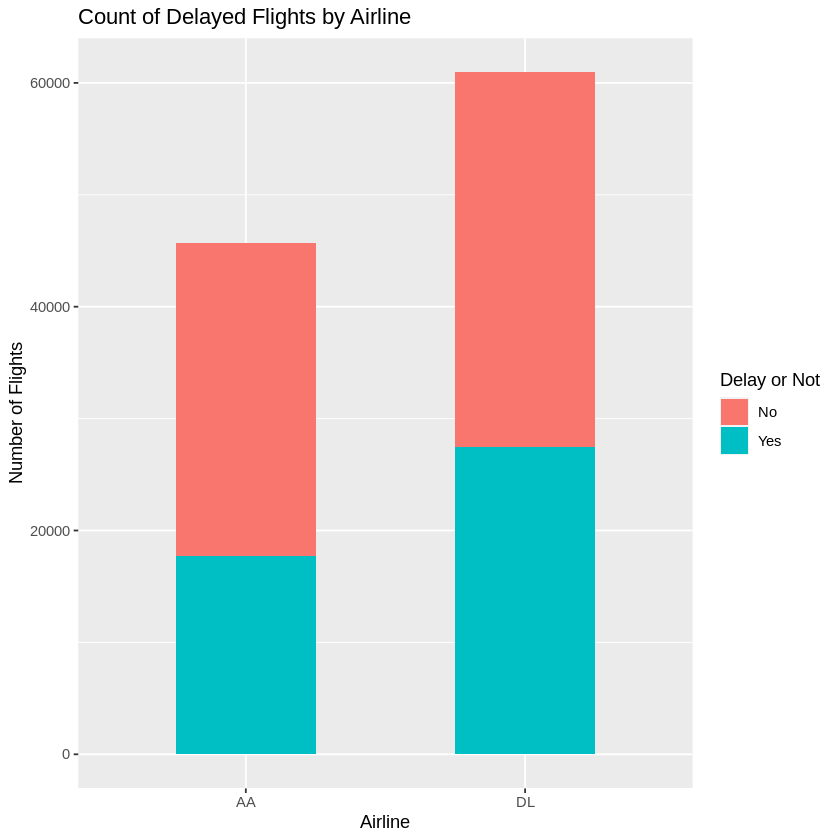

stat
<dbl>
0.06200558


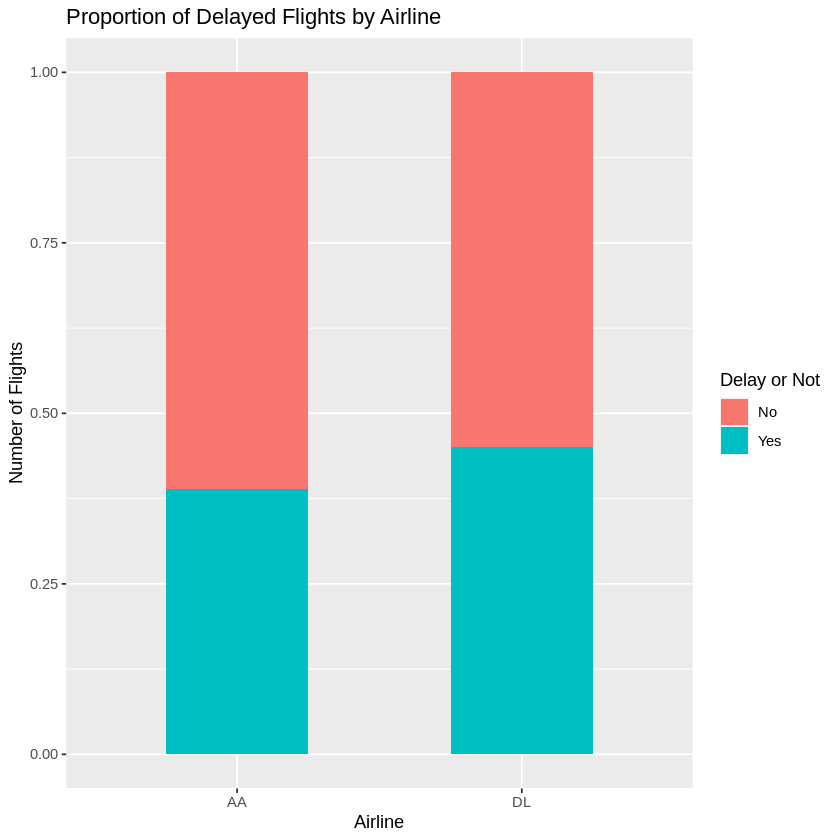

In [5]:
# Compute the estimates of the parameter
delay_data_summary <- delay_data %>%
    group_by(Airline, Delay) %>%
    summarize(count = n()) %>%
    group_by(Airline) %>%
    mutate(total = sum(count),
         proportion = count/total)

delay_data_summary

# Plot the relevant data
plot_data <- delay_data |>
    group_by(Airline, Delay) |>
    summarize(n = n()) |>
    group_by(Delay) |>
    mutate(prop = n / sum(n))



plot <- delay_data %>%
    ggplot(aes(x = Airline, fill = Delay)) +
    geom_bar(width = 0.5) +
    ggtitle("Count of Delayed Flights by Airline") +
    ylab("Number of Flights") +
    scale_fill_discrete(name = "Delay or Not",
                          breaks = c("0", "1"),
                          labels = c("No", "Yes")) 

plot

plot2 <- delay_data %>%
    ggplot(aes(x = Airline, fill = Delay)) +
    geom_bar(width = 0.5, position = "fill") +
    ggtitle("Proportion of Delayed Flights by Airline") +
    ylab("Number of Flights") +
    scale_fill_discrete(name = "Delay or Not",
                          breaks = c("0", "1"),
                          labels = c("No", "Yes")) 

plot2

# calculate observed test statistic
obs_diff_prop <- delay_data |> 
    specify(Delay ~ Airline, success = "1") |> 
    calculate(stat = "diff in props", order = c("DL", "AA"))

obs_diff_prop

## Hypothesis test via bootstrapping method

We set the reps to 240 since the we have more than 100000 rows in the data and it's hard to perform more bootstrapping replicate with such large data size.

In [6]:
# create the null model
null_distribution <- delay_data |> 
    specify(formula = Delay ~ Airline, success = "1") |> 
    hypothesize(null = "independence") |> 
    generate(reps = 240, type = "permute") |> 
    calculate(stat = "diff in props", order = c("DL", "AA"))

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


lower_ci,upper_ci
<dbl>,<dbl>
0.05621982,0.06779134


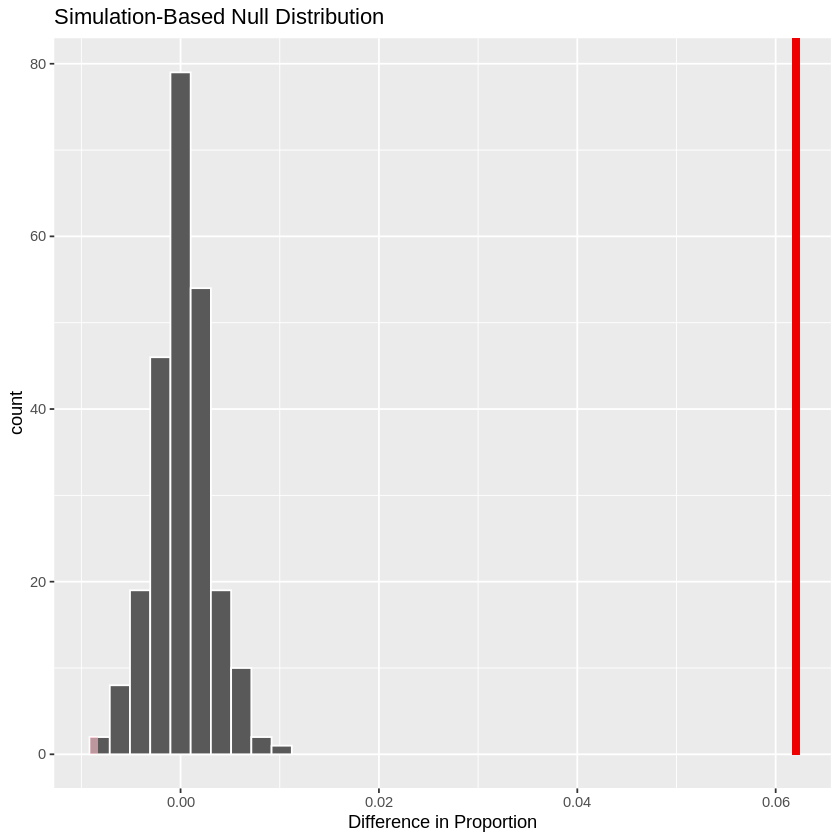

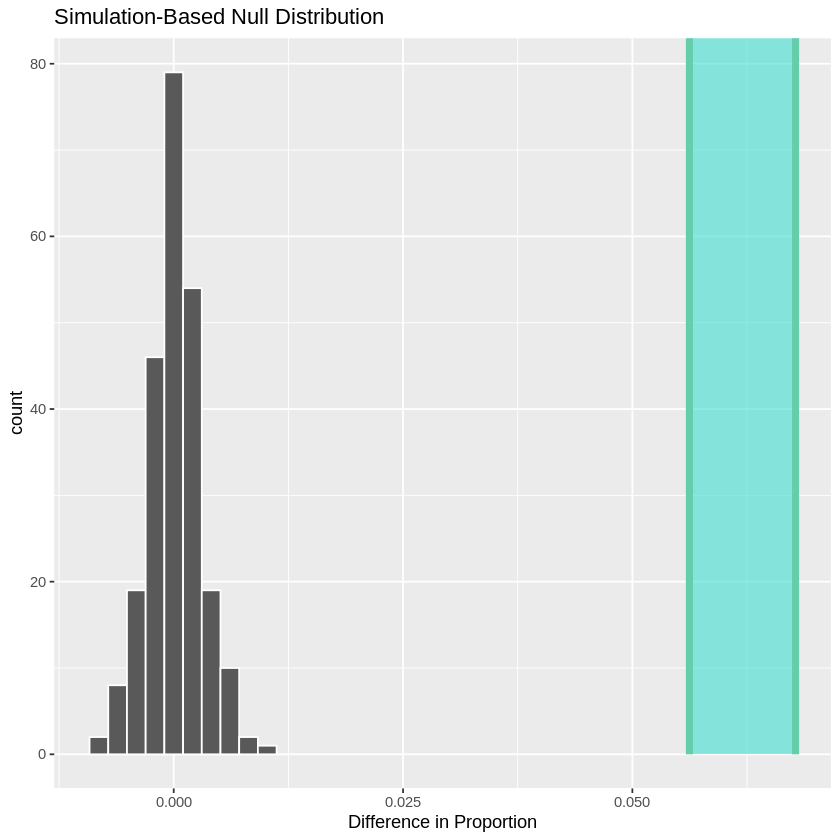

In [8]:
# visualize the null model and the position of observed test statistic
visualize(null_distribution, bins = 10) +
    shade_p_value(obs_stat = obs_diff_prop, direction = "both") +
    xlab("Difference in Proportion")

# calculate the P-value
get_p_value(null_distribution, obs_stat = obs_diff_prop, direction = "both")

# calculate the 95% confidence interval
ci <- null_distribution |>
    get_confidence_interval(type = "se", point_estimate = obs_diff_prop, level = 0.95)
ci

# visualize the confidence interval
ci_plot <- visualize(null_distribution, bins = 10) +
    shade_confidence_interval(endpoints = ci) + 
    xlab("Difference in Proportion")
ci_plot

### Result

First, we notice that is the p value is equal to 0 and the position of the test statistic cover none of the observations in the null distribution. Based on these two discoveries, we decided to reject the null hypothesis at a common 95% significance level. In other word, we believe that there exists difference between the proportion of delayed flights operated by Delta Airlines versus American Airlines.

## Hypothesis test via theorey based approach

• $H_0 : p_1 = p_2$

• $H_a : p_1 ≠ p_2$

test statistic = $\frac{\hat{p_1} - \hat{p_2}} {\sqrt{\hat{p}(1 - \hat{p})(\frac{1} {n_1} + \frac{1} {n_2})}}$

where $\hat{p} = \frac{n_1\hat{p_1} + n_2\hat{p_2}} {n_1 + n_2}$

$\hat{p_1}$ : the proportion of delayed flights operated by Delta Airlines

$\hat{p_2}$ : the proportion of delayed flights operated by American Airlines

$n_1$ : the number of flights operated by Delta Airlines in the sample 

$n_2$ : the number of flights operated by American Airlines in the sample 

In [23]:
n1 <- sum(delay_data$Airline == "DL")
n2 <- sum(delay_data$Airline == "AA")
phat1 <- sum(delay_data$Airline == "DL" & delay_data$Delay == "1") / n1
phat2 <- sum(delay_data$Airline == "AA" & delay_data$Delay == "1") / n2

# perform the hypothesis test 
result <- tidy(
            prop.test(
                x = c(n1 * phat1, n2 * phat2),
                n = c(n1, n2),
                correct = FALSE))

result

[1] 60940

[1] 45656

[1] 0.4504759

[1] 0.3884703

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.4504759,0.3884703,410.9175,2.314218e-91,1,0.05603961,0.06797155,2-sample test for equality of proportions without continuity correction,two.sided


### Result

From the tidy output of the theory-based hypothesis test, we can see that the P value is 2.31e-91 which is much less that the significance level 0.05. So we can reject the null hypothesis that there is no difference between the proportion of delayed flights between Delta Airlines and American Airlines. To be more specific, we'd like to accept the alternative hypothesis that there exists obvious difference between them.

## Discussion

As mentioned in the results, we find there's a significant difference between the delay rate of flights operated by Delta Airlines and American Airlines. This is our expected results. If most of the companies' airlines have the same delay rate, evaluating the company by comparing the average delay rate is meaningless. Moreover, this reasearch provides a convincing method to consider if there exists a significant difference. In the future, we will learn and apply more statistical method 

## Reference

1. FlightAware (2023). https://flightaware.com/live/cancelled/

2. Pedersen, U. T. (2023).Airlines Delay. https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay